In [1]:
"""
Tutorial: http://machinelearningmastery.com/naive-bayes-classifier-scratch-python/

Origem dos dados: https://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes

Attribute Information:

1. Number of times pregnant 
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test 
3. Diastolic blood pressure (mm Hg) 
4. Triceps skin fold thickness (mm) 
5. 2-Hour serum insulin (mu U/ml) 
6. Body mass index (weight in kg/(height in m)^2) 
7. Diabetes pedigree function 
8. Age (years) 
9. Class variable (0 or 1) 

** UPDATE: Until 02/28/2011 this web page indicated that there were no missing values in the dataset. As pointed out by a repository user, this cannot be true: there are zeros in places where they are biologically impossible, such as the blood pressure attribute. It seems very likely that zero values encode missing data. However, since the dataset donors made no such statement we encourage you to use your best judgement and state your assumptions.

Class Distribution: (class value 1 is interpreted as "tested positive for
   diabetes")

   Class Value  Number of instances
   0            500
   1            268

Brief statistical analysis:

    Attribute number:    Mean:   Standard Deviation:
    1.                     3.8     3.4
    2.                   120.9    32.0
    3.                    69.1    19.4
    4.                    20.5    16.0
    5.                    79.8   115.2
    6.                    32.0     7.9
    7.                     0.5     0.3
    8.                    33.2    11.8

"""

'\nTutorial: http://machinelearningmastery.com/naive-bayes-classifier-scratch-python/\n\nOrigem dos dados: https://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes\n\nAttribute Information:\n\n1. Number of times pregnant \n2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test \n3. Diastolic blood pressure (mm Hg) \n4. Triceps skin fold thickness (mm) \n5. 2-Hour serum insulin (mu U/ml) \n6. Body mass index (weight in kg/(height in m)^2) \n7. Diabetes pedigree function \n8. Age (years) \n9. Class variable (0 or 1) \n\n** UPDATE: Until 02/28/2011 this web page indicated that there were no missing values in the dataset. As pointed out by a repository user, this cannot be true: there are zeros in places where they are biologically impossible, such as the blood pressure attribute. It seems very likely that zero values encode missing data. However, since the dataset donors made no such statement we encourage you to use your best judgement and state your assumptions

## Download the data

In [2]:
# Downloading the datasets:
import requests as re
resp = re.get('https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.names')
with open('data/pima-indians-diabetes.names', 'w') as f:
    f.write(resp.text)
resp = re.get('https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data')
with open('data/pima-indians-diabetes.data', 'w') as f:
    f.write('Times_pregnant,Plasma_glucose,Blood_pressure,Triceps_skin,Serum_insulin,'
            'BMI,Diabetes_pedigree,Age,Class\n')
    f.write(resp.text)

In [3]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn-notebook')
plt.style.use('ggplot')
import pandas as pd
import numpy as np
from IPython.display import display

## Read the data

In [4]:
df = pd.read_csv('data/pima-indians-diabetes.data', sep=',')
df = df.reset_index().rename(columns={'index': 'id'})
display(df.head())
display(df.describe())

"""
Provavelmente tratar zeros nessas colunas como nulos:
Plasma_glucose, Blood_pressure, Triceps_skin, Serum_insulin, BMI
"""

,id,Times_pregnant,Plasma_glucose,Blood_pressure,Triceps_skin,Serum_insulin,BMI,Diabetes_pedigree,Age,Class
0,0,6,148,72,35,0,33.6,0.627,50,1
1,1,1,85,66,29,0,26.6,0.351,31,0
2,2,8,183,64,0,0,23.3,0.672,32,1
3,3,1,89,66,23,94,28.1,0.167,21,0
4,4,0,137,40,35,168,43.1,2.288,33,1


,id,Times_pregnant,Plasma_glucose,Blood_pressure,Triceps_skin,Serum_insulin,BMI,Diabetes_pedigree,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,383.500000,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,221.846794,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,191.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,383.500000,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,575.250000,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,767.000000,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


'\nProvavelmente tratar zeros nessas colunas como nulos:\nPlasma_glucose, Blood_pressure, Triceps_skin, Serum_insulin, BMI\n'

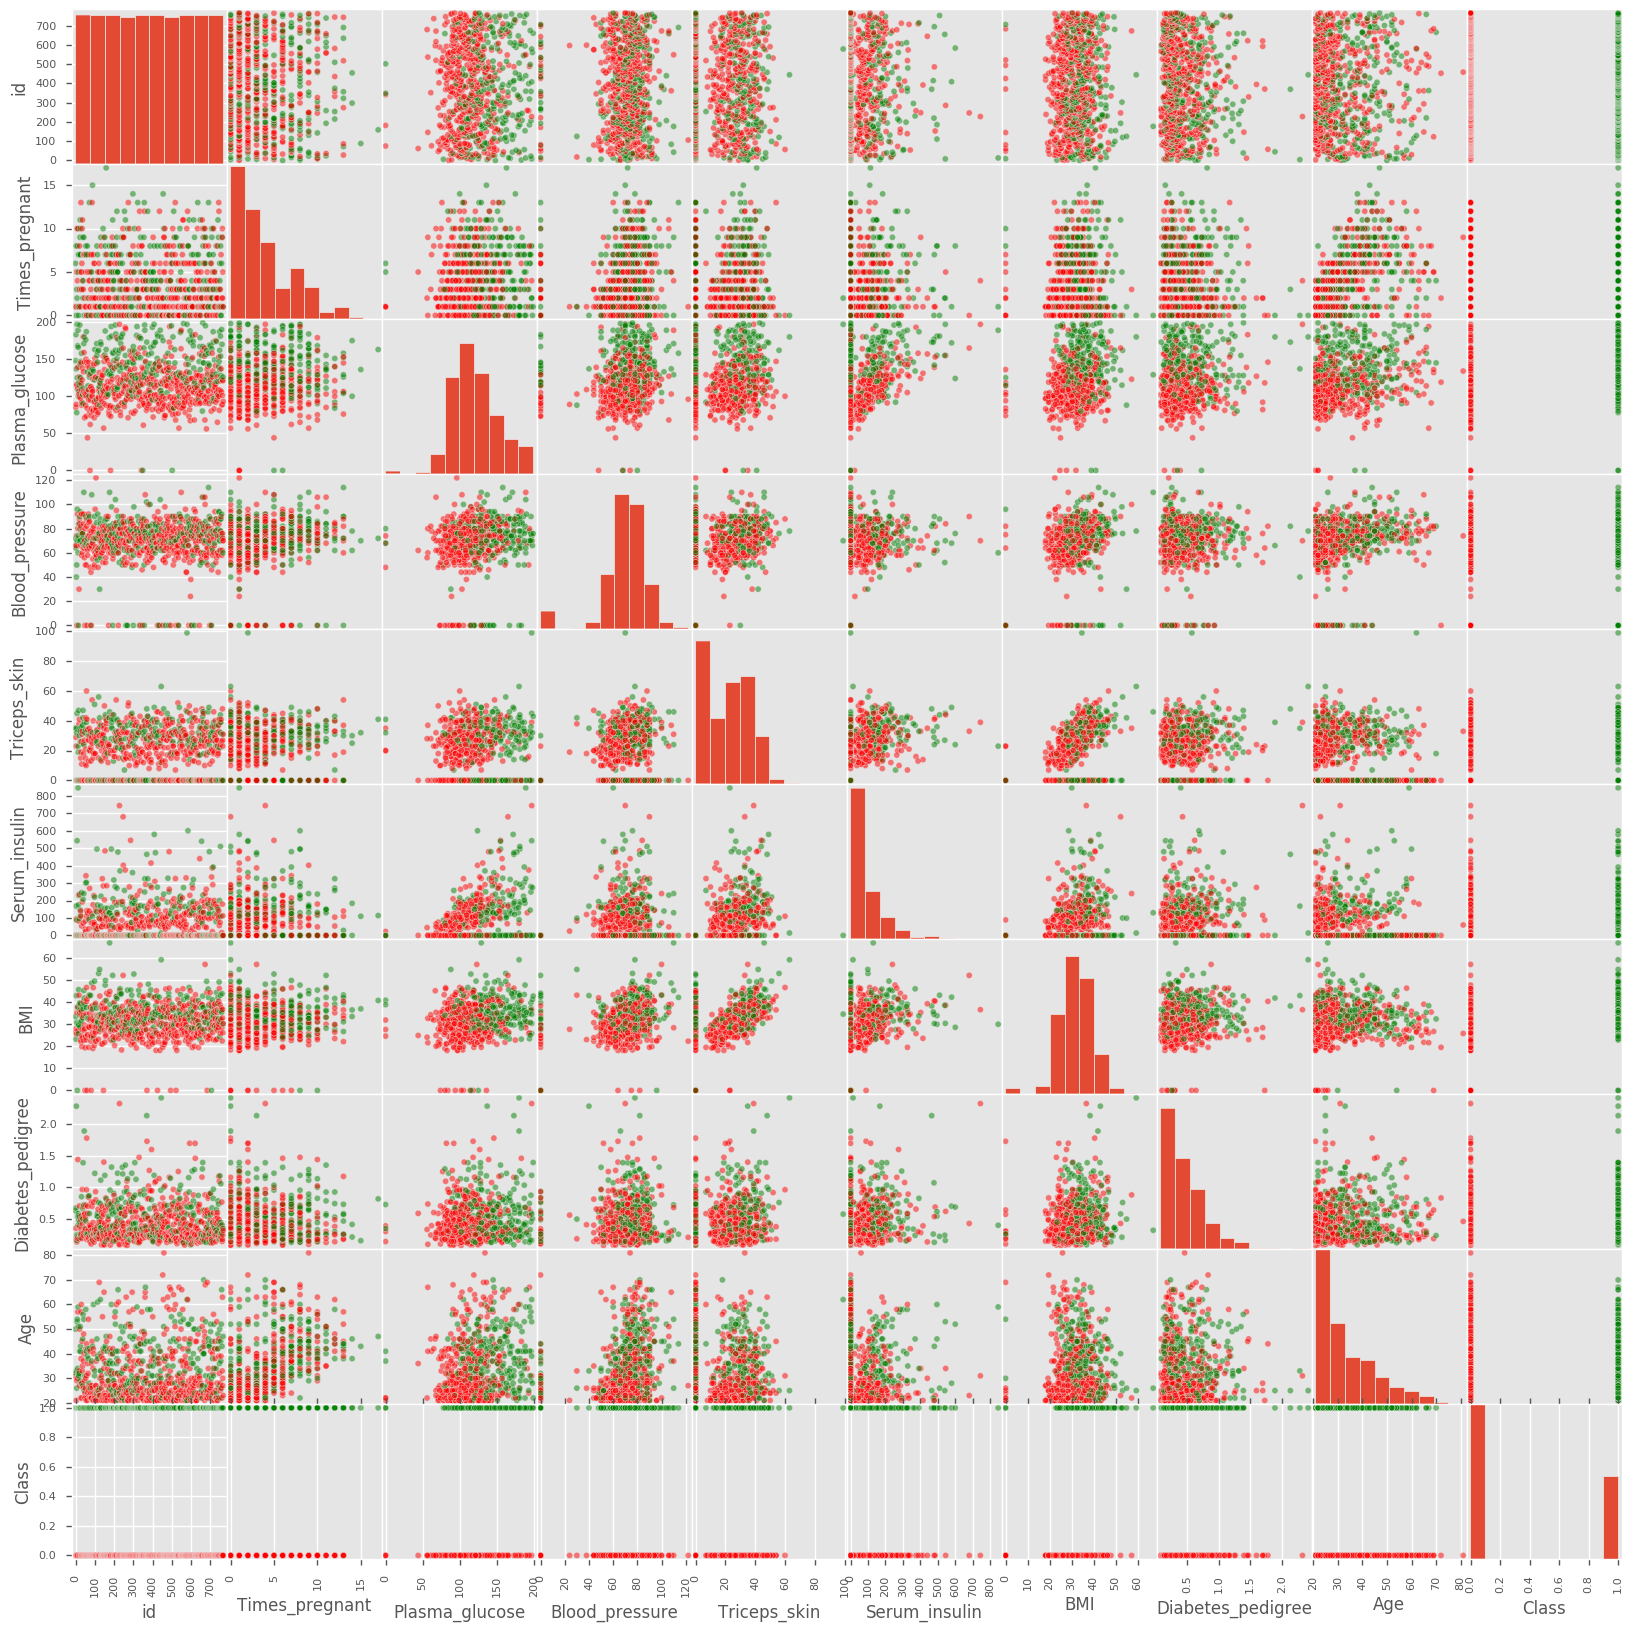

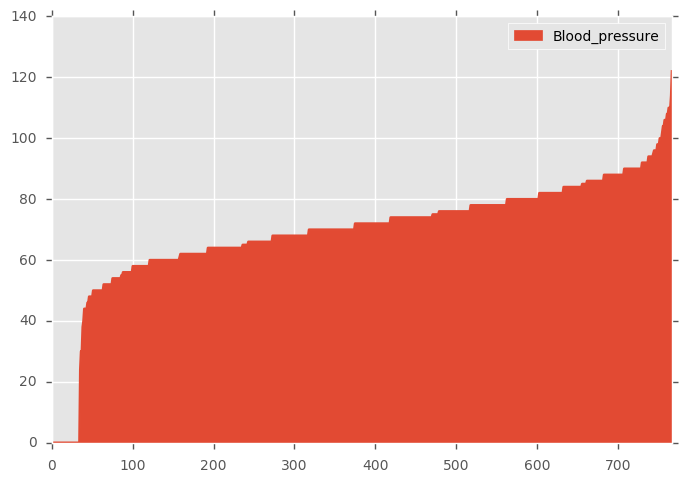

In [5]:
# import the scatter_matrix functionality
from pandas.tools.plotting import scatter_matrix

# define colors list, to be used to plot survived either red (=0) or green (=1)
colors=['red','green']

# make a scatter plot
scatter_matrix(df,figsize=[20,20],marker='o',c=df.Class.apply(lambda x:colors[x]))
#df.hist()
plt.show()
df.sort_values('Blood_pressure').reset_index().plot(kind='area', y='Blood_pressure')
plt.show()

## Select train/test dataset

In [6]:
split_ratio = 0.67
test_len = np.int(df.shape[0]*split_ratio)
train_len = df.shape[0] - test_len
df_train = df.sample(test_len)
print 'Training dataset size: %d' % df_train.shape[0]
df_test = df.sample(train_len)
print 'Test dataset size: %d' % df_test.shape[0]

Training dataset size: 514
Test dataset size: 254


## Summarize data

1.Separate Data By Class

2.Calculate Mean

3.Calculate Standard Deviation

4.Summarize Dataset

5.Summarize Attributes By Class

In [7]:
df_summary = df_train.drop('id', axis=1).groupby('Class').agg([np.mean, lambda x: np.std(x, ddof=0)])
display(df_summary)

def std(x):
    return np.std(x, ddof=1)

df_summary = df_train.drop('id', axis=1).groupby('Class').agg([np.mean, std])
display(df_summary)

Times_pregnant           Plasma_glucose            Blood_pressure  \
                mean  <lambda>           mean   <lambda>           mean   
Class                                                                     
0           3.230769  2.919026     110.662722  25.918372      67.976331   
1           4.340909  3.670789     141.801136  33.218632      70.022727   

                 Triceps_skin            Serum_insulin                    BMI  \
        <lambda>         mean   <lambda>          mean    <lambda>       mean   
Class                                                                           
0      17.496560    20.331361  14.666599     73.757396  106.348457  30.433432   
1      21.520327    22.147727  18.179059    100.176136  131.130173  35.359091   

                Diabetes_pedigree                  Age             
       <lambda>              mean  <lambda>       mean   <lambda>  
Class                                                              
0      7.711521          0.429391  0.308393  30.772189  11.477719  
1      6.557709          0.524193  0.375889  36.250000  10.956785

Times_pregnant           Plasma_glucose            Blood_pressure  \
                mean       std           mean        std           mean   
Class                                                                     
0           3.230769  2.923353     110.662722  25.956798      67.976331   
1           4.340909  3.681262     141.801136  33.313407      70.022727   

                 Triceps_skin            Serum_insulin                    BMI  \
             std         mean        std          mean         std       mean   
Class                                                                           
0      17.522500    20.331361  14.688344     73.757396  106.506128  30.433432   
1      21.581726    22.147727  18.230925    100.176136  131.504297  35.359091   

                Diabetes_pedigree                  Age             
            std              mean       std       mean        std  
Class                                                              
0      7.722954          0.429391  0.308850  30.772189  11.494736  
1      6.576419          0.524193  0.376961  36.250000  10.988045

## Make Prediction

We are now ready to make predictions using the summaries prepared from our training data. Making predictions involves calculating the probability that a given data instance belongs to each class, then selecting the class with the largest probability as the prediction.

We can divide this part into the following tasks:

1.Calculate Gaussian Probability Density Function

2.Calculate Class Probabilities

3.Make a Prediction

4.Estimate Accuracy

In [18]:
var_cols = df_summary.stack().columns.tolist()

df_test_sample = df_test
display(df_test_sample.head())
df_test_sample = pd.melt(df_test_sample, id_vars=['id', 'Class'], value_vars=var_cols)
display(df_test_sample.head())

df_aux = df_summary.stack().reset_index()
df_aux.rename(columns={'level_1':'measures'}, inplace=True)
df_metled_summary = pd.melt(df_aux, id_vars=['Class', 'measures'], value_vars=var_cols)
df_metled_summary = df_metled_summary.pivot_table(values='value', index=['Class', 'variable'], columns=['measures'])
df_metled_summary = df_metled_summary.reset_index()
display(df_metled_summary.head())

df_test_sample = df_test_sample.merge(df_metled_summary, on=['variable'], how='left')
display(df_test_sample.head())


,id,Times_pregnant,Plasma_glucose,Blood_pressure,Triceps_skin,Serum_insulin,BMI,Diabetes_pedigree,Age,Class
299,299,8,112,72,0,0,23.6,0.840,58,0
505,505,10,75,82,0,0,33.3,0.263,38,0
83,83,0,101,65,28,0,24.6,0.237,22,0
164,164,0,131,88,0,0,31.6,0.743,32,1
756,756,7,137,90,41,0,32.0,0.391,39,0


,id,Class,variable,value
0,299,0,Times_pregnant,8.0
1,505,0,Times_pregnant,10.0
2,83,0,Times_pregnant,0.0
3,164,1,Times_pregnant,0.0
4,756,0,Times_pregnant,7.0


measures,Class,variable,mean,std
0,0,Age,30.772189,11.494736
1,0,BMI,30.433432,7.722954
2,0,Blood_pressure,67.976331,17.522500
3,0,Diabetes_pedigree,0.429391,0.308850
4,0,Plasma_glucose,110.662722,25.956798


,id,Class_x,variable,value,Class_y,mean,std
0,299,0,Times_pregnant,8.0,0,3.230769,2.923353
1,299,0,Times_pregnant,8.0,1,4.340909,3.681262
2,505,0,Times_pregnant,10.0,0,3.230769,2.923353
3,505,0,Times_pregnant,10.0,1,4.340909,3.681262
4,83,0,Times_pregnant,0.0,0,3.230769,2.923353


In [20]:
import pdb
import math
def calculateProbability(df):
    #pdb.set_trace()
    x = df.value
    mean = df['mean']
    stdev = df['std']
    exponent = np.exp(-(np.square(x-mean)/(2*np.square(stdev))))
    return (1 / (np.sqrt(2*math.pi) * stdev)) * exponent

df_test_sample['prob'] = df_test_sample.apply(calculateProbability, axis=1)

########################
# Avoid underflow
df_test_sample['log_prob'] = df_test_sample.prob.map(np.log10)
########################

display(df_test_sample.head())

,id,Class_x,variable,value,Class_y,mean,std,prob,log_prob
0,299,0,Times_pregnant,8.0,0,3.230769,2.923353,0.036065,-1.442919
1,299,0,Times_pregnant,8.0,1,4.340909,3.681262,0.066126,-1.179626
2,505,0,Times_pregnant,10.0,0,3.230769,2.923353,0.009348,-2.029286
3,505,0,Times_pregnant,10.0,1,4.340909,3.681262,0.033247,-1.478248
4,83,0,Times_pregnant,0.0,0,3.230769,2.923353,0.074099,-1.130190


In [21]:
df_test_sample = df_test_sample.groupby([
        'id', 'Class_x', 'Class_y'], as_index=False)[['prob', 'log_prob']].agg({'prob': np.prod, 'log_prob': np.sum})
display(df_test_sample.head())

###############
df_test_sample['odds'] = df_test_sample.groupby(['id'])['prob'].transform(sum)
display(df_test_sample.head())
df_test_sample['odds'] = df_test_sample['prob']/df_test_sample['odds']
display(df_test_sample.head())
###############

idx = (df_test_sample.groupby(['id', 'Class_x'])['prob'].transform(max) == df_test_sample['prob'])
df_test_sample = df_test_sample[idx]
df_test_sample['right_prediction'] = (df_test_sample.Class_x - df_test_sample.Class_y == 0)
display(df_test_sample.head())

,id,Class_x,Class_y,log_prob,prob
0,1,0,0,-11.537635,2.899778e-12
1,1,0,1,-12.885365,1.302073e-13
2,3,0,0,-11.577785,2.643716e-12
3,3,0,1,-13.041041,9.098275e-14
4,5,0,0,-11.788169,1.628662e-12


,id,Class_x,Class_y,log_prob,prob,odds
0,1,0,0,-11.537635,2.899778e-12,3.029986e-12
1,1,0,1,-12.885365,1.302073e-13,3.029986e-12
2,3,0,0,-11.577785,2.643716e-12,2.734698e-12
3,3,0,1,-13.041041,9.098275e-14,2.734698e-12
4,5,0,0,-11.788169,1.628662e-12,1.815081e-12


,id,Class_x,Class_y,log_prob,prob,odds
0,1,0,0,-11.537635,2.899778e-12,0.957027
1,1,0,1,-12.885365,1.302073e-13,0.042973
2,3,0,0,-11.577785,2.643716e-12,0.966730
3,3,0,1,-13.041041,9.098275e-14,0.033270
4,5,0,0,-11.788169,1.628662e-12,0.897294


,id,Class_x,Class_y,log_prob,prob,odds,right_prediction
0,1,0,0,-11.537635,2.899778e-12,0.957027,True
2,3,0,0,-11.577785,2.643716e-12,0.966730,True
4,5,0,0,-11.788169,1.628662e-12,0.897294,True
7,7,0,1,-15.143697,7.182959e-16,0.918802,False
8,10,0,0,-12.209695,6.170282e-13,0.694766,True


In [22]:
df_result = df_test_sample.groupby('right_prediction')[['id']].count()
display(df_result)
print 'Success rate: %.1f%%' % ((df_result.ix[True]/df_result.sum()).values[0]*100)

,id
right_prediction,
False,70
True,184


Success rate: 72.4%
